In [1]:
import numpy as np
# from methods import *
from matplotlib import pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [22]:
global L, T, M, N, alpha, sigma, h, k, f_t, g_t, phi_x 

def euler_explicito(u):
    res = np.zeros((N+1, M+1))
    print(res.shape)
    uold = u[:]
    for n in range(1, N):
        u[0] = f_t
        u[M-1] = g_t
        for m in range(1, M-1):
            u[m] = sigma*uold[m-1] + (1 - 2*sigma)*uold[m] + sigma*uold[m+1]
        res[n] = u[:]
        uold = u[:]
    return res
        

In [25]:
f_t = g_t = 50
phi_x = 0
L = 10

T = 1
N = 100
M = 100
h = L/M
k = T/N
alpha = 0.5
sigma = alpha*(k/h**2)
u_0 = np.array((M+1) * [phi_x])
# print(u_0)
res = euler_explicito(u_0)
print(res[1])
print(h, k, sigma)
# print(np.linspace(0, 10, M))
x = np.zeros(N+1)
x[0] = 0
x[N] = L
for i in range(1, N):
    x[i] = x[i-1] + h
    
print(x)

(101, 101)
[50. 24. 11.  5.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. 24. 50.  0.]
0.1 0.01 0.4999999999999999
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


(101,) (101,)


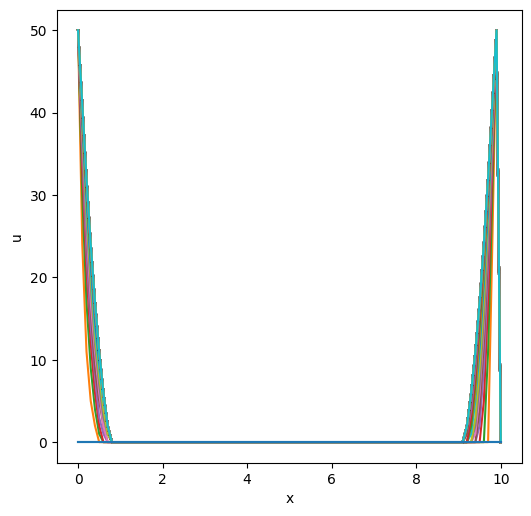

In [29]:
print(x.shape, res[0].shape)
plt.figure(dpi=100, figsize=(6, 6))
plt.axes(xlabel='x', ylabel='u')
for p in range(0, len(res)):
    plt.plot(x, res[p])
# plt.imshow(res, cmap='hot')
# plt.colorbar()
plt.show()

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


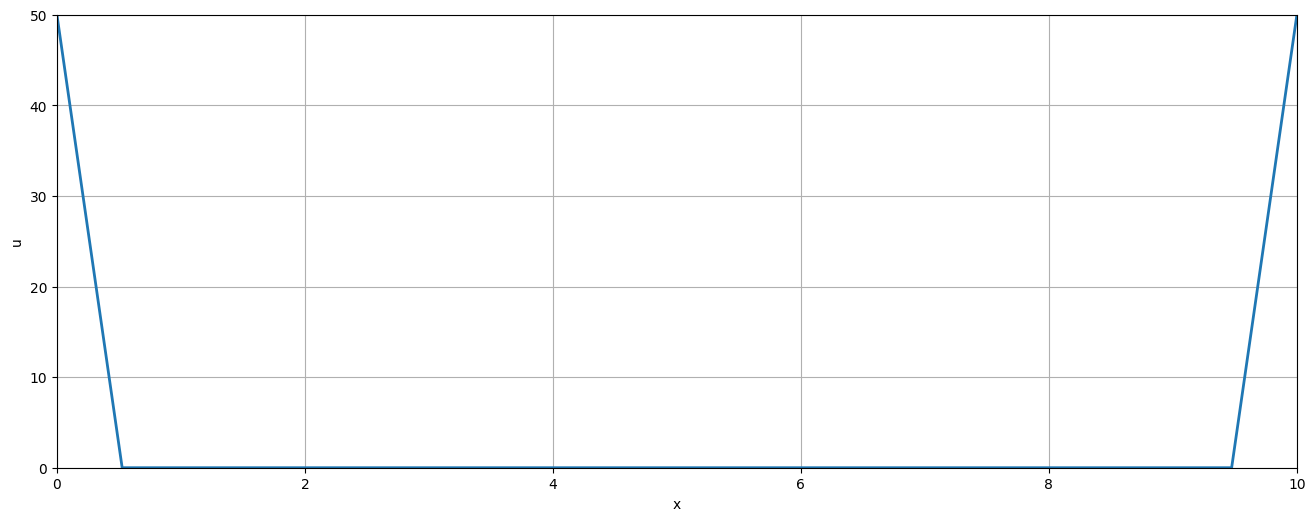

In [33]:
x = np.linspace(0, L, M)
fig = plt.figure(dpi=100, figsize=(16, 6))
ax = plt.axes(xlabel='x', ylabel='u', xlim=(0, L), ylim=(0, 50))
line, = ax.plot(x, res[0], lw=2)

def init():
    line.set_data(x, res[0])
    return line,
def animate(t):
    
#     print(t)
    y = res[t]
#     print(y)
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N, interval=80, blit=True)
anim.save('/home/parafuso828/Documents/UNESP/4_SEM_1/Métodos Numéricos para Equações/trabalho_pratico_02/basic_animation.gif', fps=30, extra_args=['-vcodec', 'libx264'])
plt.grid()
plt.show()